In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
programs_to_show = ['sequential_frontier', 'mpi_priority_frontier']
new_program = 'mpi_priority_frontier'
assert new_program in programs_to_show
old_program = 'sequential_frontier'
assert old_program in programs_to_show

In [3]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-07-priority-frontier.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
323,67,add,23333,0.4,0.0,zipf,0,1,sequential_frontier,NaN,2832,0,234560,0
169,113,remove,39333,0.2,0.0,zipf,0,1,mpi_priority_frontier,8.0,5935,0,55437,0
353,61,add,18000,1.0,0.0,zipf,0,1,mpi_priority_frontier,8.0,4631,0,755,0
53,65,remove,23333,0.2,0.0,zipf,0,1,mpi_priority_frontier,8.0,4632,0,27178,0
502,44,independent,12666,1.0,0.0,zipf,0,0,sequential_frontier,NaN,1245,0,705540,0


In [4]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program          repetition_i                  
84                  0       mpi_priority_frontier 0                    remove   
                                                  1                    remove   
                            sequential_frontier   0                    remove   
                                                  1                    remove   
0                   0       mpi_priority_frontier 0                       add   
...                                                                       ...   
47                  0       sequential_frontier   1                 addremove   
101                 0       mpi_priority_frontier 0                 addremove   
                                                  1                 addremove   
                            sequential_frontier   0                 addremove   
                                                  1                 addremove   

                                                                input_length_1  \
generation_config_i regen_i diff_program          repetition_i                   
84                  0       mpi_priority_frontier 0                      28666   
                                                  1                      28666   
                            sequential_frontier   0                      28666   
                                                  1                      28666   
0                   0       mpi_priority_frontier 0                       2000   
...                                                                        ...   
47                  0       sequential_frontier   1                      12666   
101                 0       mpi_priority_frontier 0                      34000   
                                                  1                      34000   
                            sequential_frontier   0                      34000   
                                                  1                      34000   

                                                                input_change_strength  \
generation_config_i regen_i diff_program          repetition_i                          
84                  0       mpi_priority_frontier 0                               0.4   
                                                  1                               0.4   
                            sequential_frontier   0                               0.4   
                                                  1                               0.4   
0                   0       mpi_priority_frontier 0                               0.2   
...                                                                               ...   
47                  0       sequential_frontier   1                               1.0   
101                 0       mpi_priority_frontier 0                               0.4   
                                                  1                               0.4   
                            sequential_frontier   0                               0.4   
                                                  1                               0.4   

                                                                input_chunkiness  \
generation_config_i regen_i diff_program          repetition_i                     
84                  0       mpi_priority_frontier 0                          0.0   
                                                  1                          0.0   
                            sequential_frontier   0                          0.0   
                                                  1                          0.0   
0                   0       mpi_priority_frontier 0                          0.0   
...                                                                          ...   
47                  0       sequential_frontier   1                          0.0   
101                 0       

In [5]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

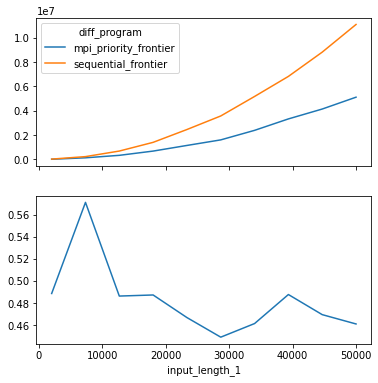

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[new_program] / temp[old_program]).plot(ax=ax[1]);

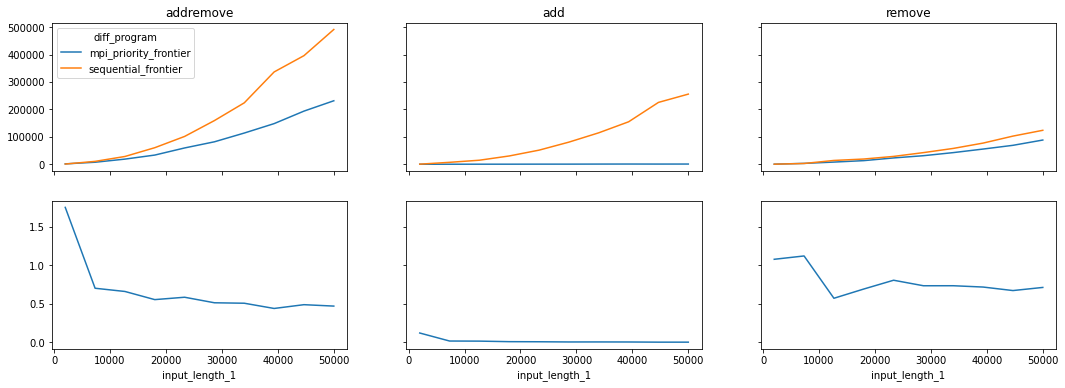

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp[new_program] / temp[old_program]).plot(ax=ax[1][input_strategy_i]);

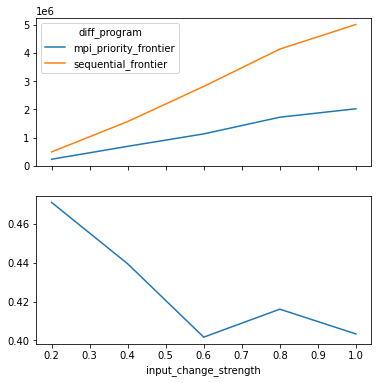

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[new_program] / temp[old_program]).plot(ax=ax[1]);

0.934375
0.921875
0.04375


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
0,remove,2000,0.2,0.0,zipf,8.0,352,0,316,0
1,addremove,2000,0.2,0.0,zipf,8.0,349,0,160628,0
2,addremove,2000,0.2,0.0,zipf,8.0,349,0,160628,0
3,remove,2000,0.4,0.0,zipf,8.0,200,0,9802,0
4,remove,2000,0.4,0.0,zipf,8.0,200,0,9802,0
5,remove,2000,0.6,0.0,zipf,8.0,251,0,8913,0
6,remove,2000,0.8,0.0,zipf,8.0,160,0,3698,0
7,addremove,2000,0.8,0.0,zipf,8.0,352,0,4696,0
8,remove,2000,1.0,0.0,zipf,8.0,158,0,26679,0
9,addremove,2000,1.0,0.0,zipf,8.0,230,0,21061,0


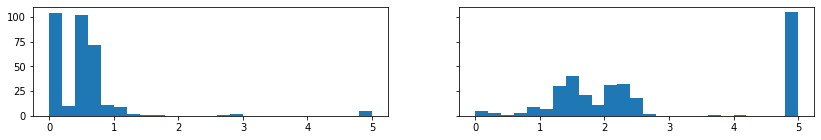

In [9]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp[new_program] < temp[old_program]).mean())
print((1.1 * temp[new_program] < temp[old_program]).mean())
print((temp[new_program] > 1.1 * temp[old_program]).mean())

fig, ax = plt.subplots(1, 2, figsize=(14, 2), sharey=True, sharex=True)
bins = np.linspace(0, 5, 5*5+1)
hist_values = temp[new_program] / temp[old_program]
hist_values = hist_values.clip(upper=5)
ax[0].hist(hist_values, bins=bins);
hist_values = temp[old_program] / temp[new_program]
hist_values = hist_values.clip(upper=5)
ax[1].hist(hist_values, bins=bins);

beaten_rows = []
for generation_config_i in temp[temp[new_program] > 1.1 * temp[old_program]].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)